In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
data = pd.read_csv("train.csv")

In [21]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [23]:
data_dev = data[0:1000].T

In [24]:
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [25]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [26]:
Y_train

array([2, 0, 7, ..., 1, 4, 0], dtype=int64)

In [27]:
X_train[:,0].shape

(784,)

In [28]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [29]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [30]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [31]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [32]:
def ReLU_deriv(Z):
    return Z > 0

In [33]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [34]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [35]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [36]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [37]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [38]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 6 6 ... 9 6 6] [2 0 7 ... 1 4 0]
0.10482926829268292
Iteration:  10
[9 2 4 ... 2 8 1] [2 0 7 ... 1 4 0]
0.1487560975609756
Iteration:  20
[9 0 9 ... 4 8 1] [2 0 7 ... 1 4 0]
0.2203170731707317
Iteration:  30
[9 0 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.3062682926829268
Iteration:  40
[4 0 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.3821951219512195
Iteration:  50
[4 0 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.44878048780487806
Iteration:  60
[4 2 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.495390243902439
Iteration:  70
[4 2 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.5329756097560976
Iteration:  80
[4 2 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.566780487804878
Iteration:  90
[4 2 7 ... 2 8 0] [2 0 7 ... 1 4 0]
0.5948292682926829
Iteration:  100
[2 2 7 ... 1 8 0] [2 0 7 ... 1 4 0]
0.62
Iteration:  110
[2 2 7 ... 1 8 0] [2 0 7 ... 1 4 0]
0.642390243902439
Iteration:  120
[2 2 7 ... 1 8 0] [2 0 7 ... 1 4 0]
0.6607317073170732
Iteration:  130
[2 2 7 ... 1 8 0] [2 0 7 ... 1 4 0]
0.6755365853658537
Iteration:  140
[2 2 7 ... 1 4 0

In [40]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


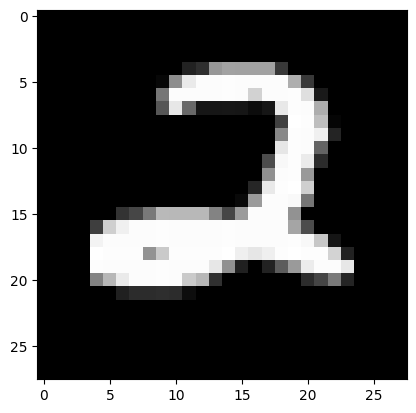

Prediction:  [0]
Label:  0


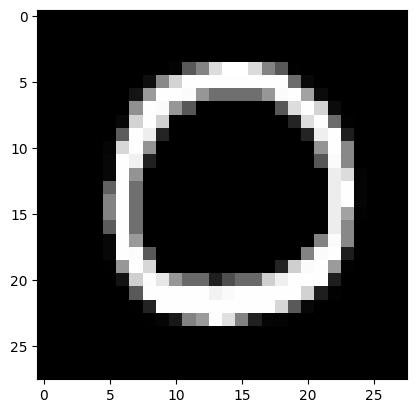

Prediction:  [7]
Label:  7


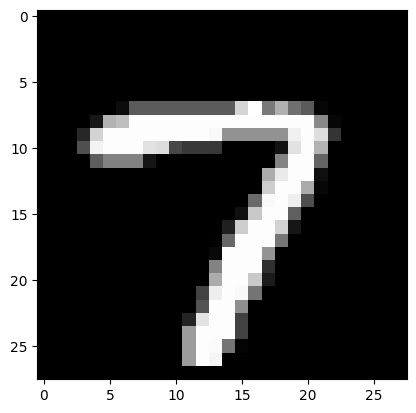

Prediction:  [3]
Label:  5


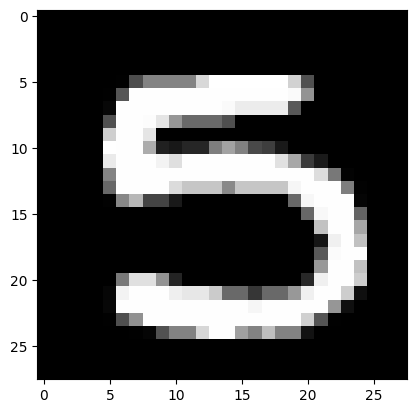

In [41]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [42]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 6 3 8 7 7 8 7 7 4 5 0 0 3 3 0 0 7 6 1 7 0 1 5 7 5 6 5 8 1 8 9 2 1 1 0 2
 7 4 1 3 9 0 3 4 6 7 9 8 1 0 8 6 7 6 2 9 5 7 2 0 9 9 1 1 9 8 4 6 1 2 4 0 7
 9 8 8 4 4 4 1 2 8 9 6 7 4 6 6 9 6 5 7 1 2 8 7 7 9 0 1 7 9 9 1 1 3 7 9 5 3
 0 3 8 1 5 8 1 5 3 7 8 3 6 4 8 4 9 0 9 4 1 1 7 2 2 5 8 1 2 4 6 0 8 3 1 0 7
 1 8 7 3 5 3 9 2 2 9 3 8 1 5 6 2 2 1 1 0 0 7 8 6 6 6 1 3 3 4 7 9 8 5 5 9 5
 6 6 5 9 9 9 6 8 5 3 6 1 0 3 8 5 0 2 6 2 4 4 2 4 0 3 8 4 9 1 8 7 1 6 2 0 0
 0 9 8 4 1 5 2 2 4 9 8 1 8 7 6 2 3 1 1 0 6 6 3 8 0 6 2 8 9 8 5 0 6 6 0 9 2
 9 7 7 8 6 7 1 8 3 2 5 1 9 3 9 9 4 7 3 3 6 7 1 1 6 9 7 1 4 2 9 9 1 5 9 0 0
 8 8 0 0 7 9 8 6 1 5 7 6 6 9 5 6 2 0 7 9 4 6 0 7 1 5 9 8 4 2 4 4 3 3 7 8 9
 5 8 1 0 0 8 6 2 0 2 9 0 0 5 8 2 0 7 0 2 7 2 0 2 5 0 8 5 9 8 9 9 9 1 4 8 6
 3 2 3 1 7 8 5 2 0 0 8 5 8 5 9 6 6 9 1 6 0 6 2 0 1 1 4 8 2 7 1 7 7 0 1 8 4
 6 7 6 6 2 1 1 3 0 9 5 1 9 5 5 8 1 1 3 0 4 9 8 1 8 2 1 8 7 6 7 6 1 1 9 1 6
 2 0 5 2 8 4 7 5 8 1 9 9 4 2 1 5 4 3 4 1 5 9 3 7 2 9 6 9 5 4 0 4 3 3 3 1 2
 2 7 1 9 5 7 0 1 7 3 0 7 

0.83